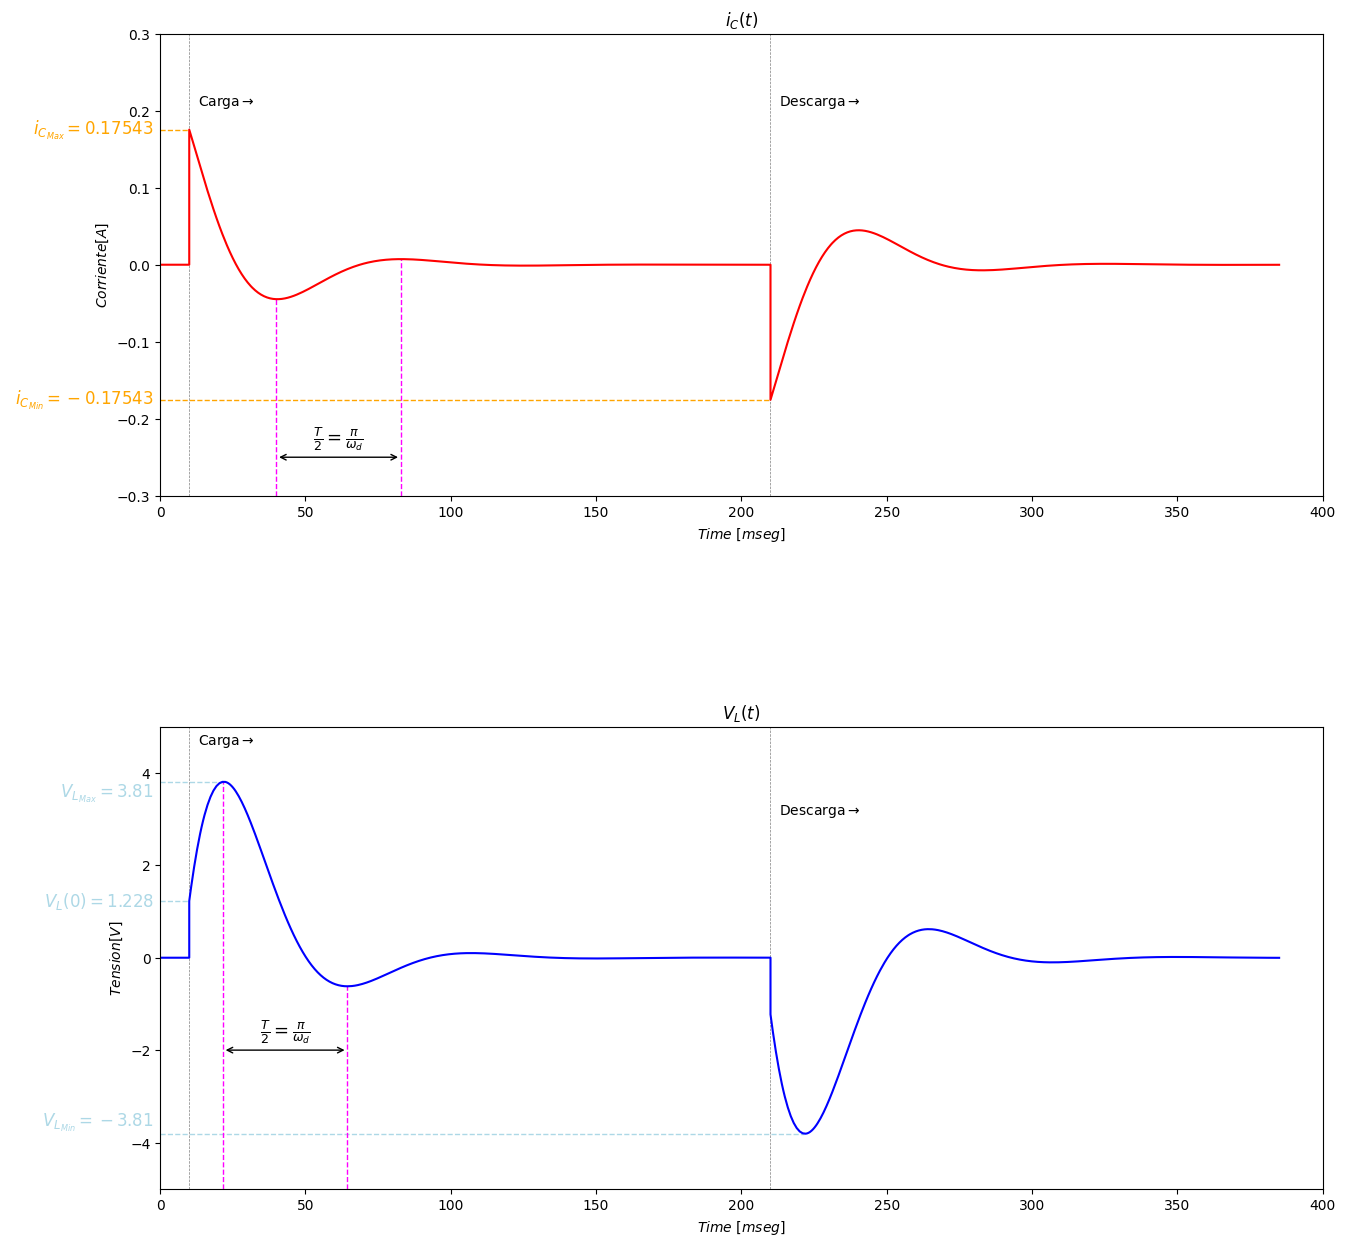

In [77]:
import ltspice
import numpy as np
import matplotlib.pyplot as plt
import os


OMEGA_D = 73.84
ALPHA = 0.19
OMEGA = 85.31
XI = 0.5

# ----------------------------     Graficos del circuito con valores fijos     --------------------------------------


#------------Load the signals from the .raw file
raw_file = 'Simulacion_con_valores_Fijos\\Simulacion_SPICE_Valores_Fijos.raw'
l = ltspice.Ltspice(raw_file) 
# Make sure that the .raw file is located in the correct path
l.parse()
#-----------------------------------------------

#Parameters for the circuit
Fs = 2.5
Ts = 1/Fs

#----------------------------Obtain basic signals
time = l.get_time()
time = (time) * 1E+3         
Vcc = l.get_data('V(vcc)')
Vlplus = l.get_data('V(vl+)')
Vlminus = l.get_data('V(vl-)')
Vl = Vlplus - Vlminus

ic = l.get_data('I(C1)')
id = l.get_data('I(V1)')
#------------------------------------------------

chargeTime = np.linspace(0, 200, 1000)
dischargeTime = np.linspace(200, 400, 1000)


#Set max and min Voltages and currents
V_upper_limit = 5
V_lower_limit = -5
I_upper_limit = 0.3
I_lower_limit = -0.3

fig = plt.figure(figsize=(15, 15))
fig.subplots_adjust(hspace=0.5)

#Current plot
plt.subplot(2, 1, 1)
plt.title("$i_C(t)$")       #title
plt.xlabel("$Time\ [m seg]$")
plt.ylabel("$Corriente [A]$")
plt.axvline(x = 210, linestyle='--', linewidth = 0.5,color='grey')
plt.text(210, 0.2, r"$\ \ \mathrm{Descarga} \rightarrow$", ha='left', va='bottom', rotation='horizontal')
plt.axvline(x = 10, linestyle='--', linewidth = 0.5,color='grey')
plt.text(10, 0.2, r"$\ \ \mathrm{Carga} \rightarrow$", ha='left', va='bottom', rotation='horizontal')
plt.plot([time[0], 10], [0.17543, 0.17543], linestyle = '--', linewidth = 1,  color = 'orange')
plt.text(0, 0.17543, r" $i_{C_{Max}} = 0.17543 $  ", ha='right', va='center', rotation='horizontal', color = 'orange', fontsize = 12)
plt.plot([time[0], 210], [-0.17543, -0.17543], linestyle = '--', linewidth = 1,  color = 'orange')
plt.text(0, - 0.17543, r" $i_{C_{Min}} = -0.17543 $  ", ha='right', va='center', rotation='horizontal', color = 'orange', fontsize = 12)
plt.plot([39.944521, 39.944521], [-0.3, -0.044715881], linestyle = '--', linewidth = 1,  color = 'magenta')
plt.plot([82.801664, 82.801664], [-0.3, 0.0072638779], linestyle = '--', linewidth = 1,  color = 'magenta')
plt.annotate("", xy=(39.944521, -0.25), xytext=(82.801664, -0.25), arrowprops=dict(arrowstyle='<->'))
plt.annotate(r"$\frac{T}{2} = \frac{\pi}{\omega_d}$", xy=(0.5*(39.944521+82.801664), -0.25), xytext=(0, 10),textcoords='offset points', ha='center', fontsize = 13)
plt.xlim(0, Ts*1E+3)
plt.ylim(I_lower_limit, I_upper_limit)

plt.plot(time , ic, 'r')

#Voltage plot
plt.subplot(2, 1, 2)
plt.title("$V_L(t)$")
plt.xlabel("$Time\ [m seg]$")
plt.ylabel("$Tension [V]$")
plt.axvline(x = 210, linestyle='--', linewidth = 0.5,color='grey')
plt.text(210, 3, r"$\ \ \mathrm{Descarga} \rightarrow$", ha='left', va='bottom', rotation='horizontal')
plt.axvline(x = 10, linestyle='--', linewidth = 0.5,color='grey')
plt.text(10, 4.5, r"$\ \ \mathrm{Carga} \rightarrow$", ha='left', va='bottom', rotation='horizontal')
plt.plot([time[0], 21.555403], [3.8061319, 3.8061319], linestyle = '--', linewidth = 1,  color = 'lightblue')
plt.text(0, 3.8061319, r" $V_{L_{Max}} = 3.81 $  ", ha='right', va='top', rotation='horizontal', color = 'lightblue', fontsize = 12)
plt.plot([time[0], 10], [1.228, 1.228], linestyle = '--', linewidth = 1,  color = 'lightblue')
plt.text(0, 1.228, r" $V_{L}(0) = 1.228 $  ", ha='right', va='center', rotation='horizontal', color = 'lightblue', fontsize = 12)
plt.plot([time[0], 21.555403 + 200], [-3.8061319, -3.8061319], linestyle = '--', linewidth = 1,  color = 'lightblue')
plt.text(0, -3.8061319, r" $V_{L_{Min}} = -3.81 $  ", ha='right', va='bottom', rotation='horizontal', color = 'lightblue', fontsize = 12)
plt.plot([21.555403, 21.555403], [-5, 3.8061319], linestyle = '--', linewidth = 1,  color = 'magenta')
plt.plot([64.418445, 64.418445], [-5, -0.61818752], linestyle = '--', linewidth = 1,  color = 'magenta')
plt.annotate("", xy=(21.555403, -2), xytext=(64.418445, -2), arrowprops=dict(arrowstyle='<->'))
plt.annotate(r"$\frac{T}{2} = \frac{\pi}{\omega_d}$", xy=(0.5*(21.555403+64.418445), -2), xytext=(0, 10),textcoords='offset points', ha='center', fontsize = 13)
plt.xlim(0, Ts*1E+3)
plt.ylim(V_lower_limit, V_upper_limit)

plt.plot(time , Vl, 'b')
plt.show()